In [1]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2019-06-01 07:56:21--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  8.79MB/s    in 60s     

2019-06-01 07:57:22 (12.6 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [2]:
!tar -xvf images.tar

Images/
Images/n02085620-Chihuahua/
Images/n02085620-Chihuahua/n02085620_10621.jpg
Images/n02085620-Chihuahua/n02085620_10976.jpg
Images/n02085620-Chihuahua/n02085620_11238.jpg
Images/n02085620-Chihuahua/n02085620_11258.jpg
Images/n02085620-Chihuahua/n02085620_11337.jpg
Images/n02085620-Chihuahua/n02085620_1152.jpg
Images/n02085620-Chihuahua/n02085620_11696.jpg
Images/n02085620-Chihuahua/n02085620_11818.jpg
Images/n02085620-Chihuahua/n02085620_11948.jpg
Images/n02085620-Chihuahua/n02085620_1205.jpg
Images/n02085620-Chihuahua/n02085620_12334.jpg
Images/n02085620-Chihuahua/n02085620_1235.jpg
Images/n02085620-Chihuahua/n02085620_1298.jpg
Images/n02085620-Chihuahua/n02085620_13151.jpg
Images/n02085620-Chihuahua/n02085620_1321.jpg
Images/n02085620-Chihuahua/n02085620_13383.jpg
Images/n02085620-Chihuahua/n02085620_1346.jpg
Images/n02085620-Chihuahua/n02085620_14413.jpg
Images/n02085620-Chihuahua/n02085620_14516.jpg
Images/n02085620-Chihuahua/n02085620_1455.jpg
Images/n02085620-Chihuahua/n020

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D ,Dropout, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation , Conv2D
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers

Using TensorFlow backend.


In [4]:
base_model = InceptionV3(weights='imagenet', include_top=False)


Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 3s 0us/step


In [5]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [6]:
print(base_model.trainable_weights)

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>, <tf.Variable 'batch_normalization_1/beta:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 32, 32) dtype=float32_ref>, <tf.Variable 'batch_normalization_2/beta:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>, <tf.Variable 'batch_normalization_3/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv2d_4/kernel:0' shape=(1, 1, 64, 80) dtype=float32_ref>, <tf.Variable 'batch_normalization_4/beta:0' shape=(80,) dtype=float32_ref>, <tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 80, 192) dtype=float32_ref>, <tf.Variable 'batch_normalization_5/beta:0' shape=(192,) dtype=float32_ref>, <tf.Variable 'conv2d_9/kernel:0' shape=(1, 1, 192, 64) dtype=float32_ref>, <tf.Variable 'batch_normalization_9/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'conv2d_7/kernel:0' shape=(1, 1, 192, 48) dtype=float32_ref>, <tf.Variable 'conv2d_1

In [7]:
print(len(base_model.trainable_weights))

188


In [8]:
import os
print(len(next(os.walk('Images/'))[1]))

120


In [9]:
basedir = 'Images/'
def main(): 
    i = 0
      
    for filename in os.listdir("Images/"): 
        name = filename.split("-")
        print(name[0])
        print(name[1])
        print(filename)

        os.rename(os.path.join(basedir,filename), os.path.join(basedir,str(name[1]))) 
  
if __name__ == '__main__': 
      
    main() 

n02104029
kuvasz
n02104029-kuvasz
n02109525
Saint_Bernard
n02109525-Saint_Bernard
n02096437
Dandie_Dinmont
n02096437-Dandie_Dinmont
n02085782
Japanese_spaniel
n02085782-Japanese_spaniel
n02095314
wire
n02095314-wire-haired_fox_terrier
n02098413
Lhasa
n02098413-Lhasa
n02091244
Ibizan_hound
n02091244-Ibizan_hound
n02097130
giant_schnauzer
n02097130-giant_schnauzer
n02091467
Norwegian_elkhound
n02091467-Norwegian_elkhound
n02105162
malinois
n02105162-malinois
n02112137
chow
n02112137-chow
n02099429
curly
n02099429-curly-coated_retriever
n02093991
Irish_terrier
n02093991-Irish_terrier
n02099601
golden_retriever
n02099601-golden_retriever
n02101556
clumber
n02101556-clumber
n02113023
Pembroke
n02113023-Pembroke
n02086910
papillon
n02086910-papillon
n02105056
groenendael
n02105056-groenendael
n02090379
redbone
n02090379-redbone
n02112350
keeshond
n02112350-keeshond
n02093754
Border_terrier
n02093754-Border_terrier
n02107908
Appenzeller
n02107908-Appenzeller
n02111129
Leonberg
n02111129-Leonb

In [10]:
CLASSES = 120
x = base_model.output
print(x)
print(x.shape)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(CLASSES,activation='softmax')(x) #final layer with softmax activation

# x = Dropout(0.4)(x)
# x= Dense(64)(x)
# x = Activation('relu')(x)

model = Model(inputs=base_model.input, outputs=preds)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


Tensor("mixed10/concat:0", shape=(?, ?, ?, 2048), dtype=float32)
(?, ?, ?, 2048)


In [0]:
for layer in base_model.layers:
    layer.trainable = True

In [0]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
data_dir = 'Images'
train_dir = data_dir


In [15]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(299,299), batch_size=20)


Found 20580 images belonging to 120 classes.


In [16]:
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8)

import h5py
EPOCHS = 25
BATCH_SIZE = 20
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64
MODEL_FILE = 'Dogs.h5'
history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[early_stopping_callback])
  
model.save(MODEL_FILE)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
320/320 [==============================] - 186s 582ms/step - loss: 3.2294 - acc: 0.2336
Epoch 2/25


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


320/320 [==============================] - 170s 530ms/step - loss: 2.5470 - acc: 0.3381
Epoch 3/25
320/320 [==============================] - 169s 528ms/step - loss: 2.3159 - acc: 0.3809
Epoch 4/25
320/320 [==============================] - 169s 528ms/step - loss: 2.0696 - acc: 0.4320
Epoch 5/25
320/320 [==============================] - 168s 524ms/step - loss: 1.9993 - acc: 0.4483
Epoch 6/25
320/320 [==============================] - 168s 525ms/step - loss: 1.8654 - acc: 0.4903
Epoch 7/25
320/320 [==============================] - 168s 525ms/step - loss: 1.7709 - acc: 0.5045
Epoch 8/25
320/320 [==============================] - 168s 524ms/step - loss: 1.6560 - acc: 0.5261
Epoch 9/25
320/320 [==============================] - 168s 524ms/step - loss: 1.6279 - acc: 0.5439
Epoch 10/25
320/320 [==============================] - 168s 525ms/step - loss: 1.5783 - acc: 0.5455
Epoch 11/25
320/320 [==============================] - 168s 525ms/step - loss: 1.5057 - acc: 0.5702
Epoch 12/25
320/320

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

dict_keys(['loss', 'acc'])


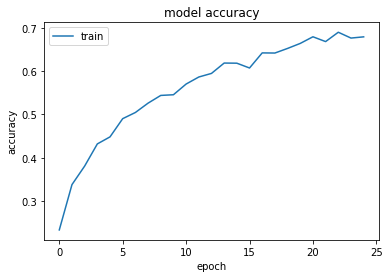

In [20]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(preds)
    return preds[0]
img = image.load_img('french_bulldog.jpg', target_size=(299, 299))
preds = predict(load_model(MODEL_FILE), img)


[[1.15415764e-06 1.59905758e-05 1.47096796e-06 5.25247422e-04
  2.60835264e-07 1.54013524e-05 1.34685661e-06 4.52885473e-07
  7.77207515e-06 1.16517947e-06 6.09483550e-06 8.37499090e-03
  7.04776994e-06 2.22756667e-03 1.79246797e-06 1.42328408e-05
  4.68087410e-06 1.20324735e-02 7.57476869e-07 2.82354881e-06
  1.26760506e-06 3.78057825e-06 2.04329058e-06 1.74637520e-07
  2.04215871e-06 9.64175880e-01 5.59238106e-06 7.01077943e-06
  1.56930844e-06 1.06196079e-04 2.44994339e-06 5.76198659e-07
  5.10653399e-06 2.10807730e-06 2.08707443e-05 2.16319336e-06
  8.12603616e-07 1.29277087e-05 8.24086328e-06 7.89539354e-06
  2.42026599e-05 1.50628994e-05 2.18346167e-06 1.92748903e-05
  1.33289868e-05 9.53155395e-05 2.05811284e-06 4.17436286e-06
  7.88492707e-06 1.44872974e-05 1.52889299e-07 1.08319211e-04
  3.94211929e-06 1.57680115e-05 3.02098197e-05 1.96672136e-06
  3.82898224e-06 1.91146523e-06 1.04377705e-06 5.22064511e-05
  4.57070399e-07 3.99421424e-06 4.36033724e-06 3.89138186e-05
  2.6790

In [31]:
print(len(preds))
print(preds.argmax())


120
25


In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [33]:
labels

{0: 'Afghan_hound',
 1: 'African_hunting_dog',
 2: 'Airedale',
 3: 'American_Staffordshire_terrier',
 4: 'Appenzeller',
 5: 'Australian_terrier',
 6: 'Bedlington_terrier',
 7: 'Bernese_mountain_dog',
 8: 'Blenheim_spaniel',
 9: 'Border_collie',
 10: 'Border_terrier',
 11: 'Boston_bull',
 12: 'Bouvier_des_Flandres',
 13: 'Brabancon_griffon',
 14: 'Brittany_spaniel',
 15: 'Cardigan',
 16: 'Chesapeake_Bay_retriever',
 17: 'Chihuahua',
 18: 'Dandie_Dinmont',
 19: 'Doberman',
 20: 'English_foxhound',
 21: 'English_setter',
 22: 'English_springer',
 23: 'EntleBucher',
 24: 'Eskimo_dog',
 25: 'French_bulldog',
 26: 'German_shepherd',
 27: 'German_short',
 28: 'Gordon_setter',
 29: 'Great_Dane',
 30: 'Great_Pyrenees',
 31: 'Greater_Swiss_Mountain_dog',
 32: 'Ibizan_hound',
 33: 'Irish_setter',
 34: 'Irish_terrier',
 35: 'Irish_water_spaniel',
 36: 'Irish_wolfhound',
 37: 'Italian_greyhound',
 38: 'Japanese_spaniel',
 39: 'Kerry_blue_terrier',
 40: 'Labrador_retriever',
 41: 'Lakeland_terrier',

In [34]:
print(labels[preds.argmax()])

French_bulldog


In [35]:
!pip install keras-vis

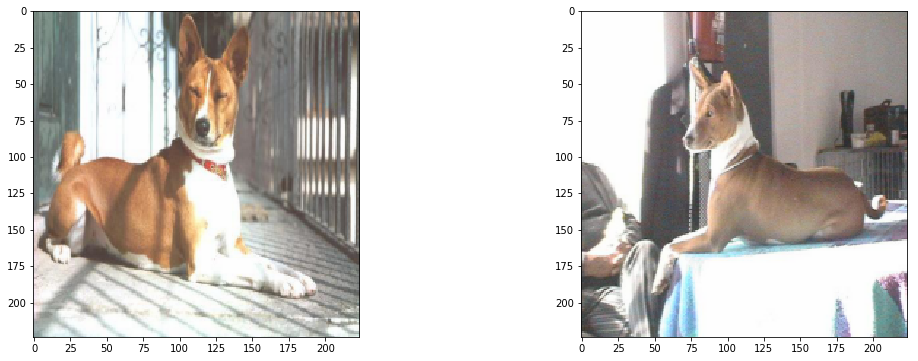

In [27]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
img1 = utils.load_img('Images/basenji/n02110806_1396.jpg', target_size=(224, 224))

img2 = utils.load_img('Images/basenji/n02110806_1035.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [0]:
model.layers[1]
weight_conv2d_1 = model.layers[1].get_weights()[0][:,:,0,:]



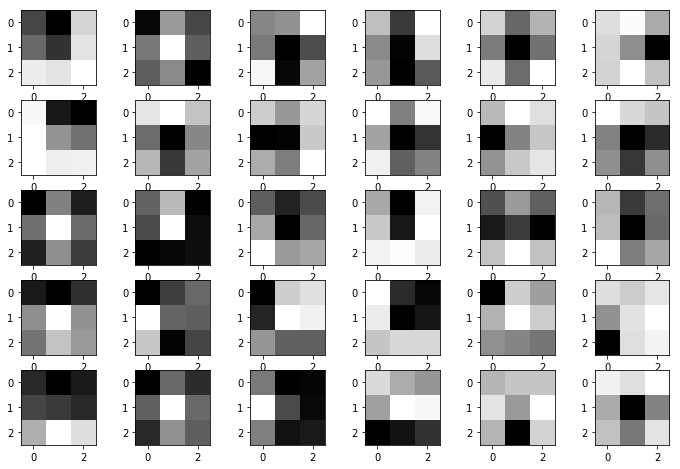

In [29]:
col_size = 6
row_size = 5
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1